In [1]:
import numpy as np
import pandas as pd
# these below libraries are for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv("Diwali Sales Data.csv", encoding='unicode_escape')

In [4]:
# just checking 5 rows of dataframe
df.head(5)

,User_ID,Cust_name,Product_ID,Gender,Age Group,Age,Marital_Status,State,Zone,Occupation,Product_Category,Orders,Amount,Status,unnamed1
0,1002903,Sanskriti,P00125942,F,26-35,28,0,Maharashtra,Western,Healthcare,Auto,1,23952.0,NaN,NaN
1,1000732,Kartik,P00110942,F,26-35,35,1,Andhra Pradesh,Southern,Govt,Auto,3,23934.0,NaN,NaN
2,1001990,Bindu,P00118542,F,26-35,35,1,Uttar Pradesh,Central,Automobile,Auto,3,23924.0,NaN,NaN
3,1001425,Sudevi,P00237842,M,0-17,16,0,Karnataka,Southern,Construction,Auto,2,23912.0,NaN,NaN
4,1000588,Joni,P00057942,M,26-35,28,1,Gujarat,Western,Food Processing,Auto,2,23877.0,NaN,NaN


In [5]:
# to get the info about every column do .info on dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11251 entries, 0 to 11250
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11251 non-null  int64  
 1   Cust_name         11251 non-null  object 
 2   Product_ID        11251 non-null  object 
 3   Gender            11251 non-null  object 
 4   Age Group         11251 non-null  object 
 5   Age               11251 non-null  int64  
 6   Marital_Status    11251 non-null  int64  
 7   State             11251 non-null  object 
 8   Zone              11251 non-null  object 
 9   Occupation        11251 non-null  object 
 10  Product_Category  11251 non-null  object 
 11  Orders            11251 non-null  int64  
 12  Amount            11239 non-null  float64
 13  Status            0 non-null      float64
 14  unnamed1          0 non-null      float64
dtypes: float64(3), int64(4), object(8)
memory usage: 1.3+ MB


## Data cleaning has to be done before starting data analysis, so below few steps are regarding data cleaning

In [8]:
# drop the null columns as they are of no use
df = df.drop(['Status','unnamed1'],axis=1)

In [9]:
# we can see there are 12 null values in amount column
df.isnull().sum()

User_ID              0
Cust_name            0
Product_ID           0
Gender               0
Age Group            0
Age                  0
Marital_Status       0
State                0
Zone                 0
Occupation           0
Product_Category     0
Orders               0
Amount              12
dtype: int64

In [12]:
# drop those 12 null columns
df = df.dropna()

In [14]:
# now we can see all null values are gone
df.isnull().sum()

User_ID             0
Cust_name           0
Product_ID          0
Gender              0
Age Group           0
Age                 0
Marital_Status      0
State               0
Zone                0
Occupation          0
Product_Category    0
Orders              0
Amount              0
dtype: int64

In [15]:
# we can see that amount is a floating type
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   User_ID           11239 non-null  int64  
 1   Cust_name         11239 non-null  object 
 2   Product_ID        11239 non-null  object 
 3   Gender            11239 non-null  object 
 4   Age Group         11239 non-null  object 
 5   Age               11239 non-null  int64  
 6   Marital_Status    11239 non-null  int64  
 7   State             11239 non-null  object 
 8   Zone              11239 non-null  object 
 9   Occupation        11239 non-null  object 
 10  Product_Category  11239 non-null  object 
 11  Orders            11239 non-null  int64  
 12  Amount            11239 non-null  float64
dtypes: float64(1), int64(4), object(8)
memory usage: 1.2+ MB


In [16]:
# change 'amount' from floating values to int
df['Amount'] = df['Amount'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11239 entries, 0 to 11250
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   User_ID           11239 non-null  int64 
 1   Cust_name         11239 non-null  object
 2   Product_ID        11239 non-null  object
 3   Gender            11239 non-null  object
 4   Age Group         11239 non-null  object
 5   Age               11239 non-null  int64 
 6   Marital_Status    11239 non-null  int64 
 7   State             11239 non-null  object
 8   Zone              11239 non-null  object
 9   Occupation        11239 non-null  object
 10  Product_Category  11239 non-null  object
 11  Orders            11239 non-null  int64 
 12  Amount            11239 non-null  int32 
dtypes: int32(1), int64(4), object(8)
memory usage: 1.2+ MB


# EXPLORATORY DATA ANALYSIS

*now begins the exploratory data analysis where we will start analysing the dataFrame which we made above and drawing some conclusions from it....*

<Figure size 1500x600 with 0 Axes>

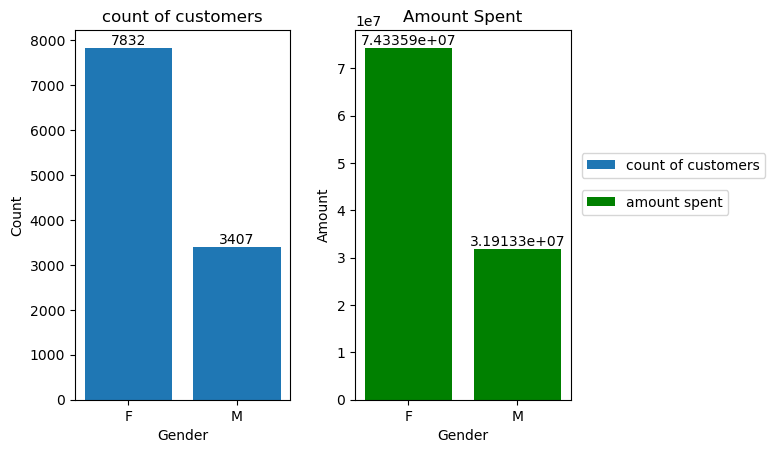

In [81]:
# now lets see who(m/f) is buying more crackers

count_data = df[['User_ID','Gender']].groupby('Gender').count().reset_index()
sum_data = df[['User_ID','Gender','Amount']].groupby('Gender').sum(numeric_only=True).reset_index()

plt.figure(figsize=(10,4),dpi = 150)
fig,axes = plt.subplots(nrows=1,ncols=2)

axes[0].bar(count_data['Gender'],count_data['User_ID'],label='count of customers')
axes[0].set_xlabel('Gender')
axes[0].set_ylabel('Count')
axes[0].set_title('count of customers')
for i in axes[0].containers:
    axes[0].bar_label(i)
axes[0].legend(loc=(2.35,0.6))

axes[1].bar(sum_data['Gender'],sum_data['Amount'],label='amount spent',color='green')
axes[1].set_xlabel('Gender')
axes[1].set_ylabel('Amount')
axes[1].set_title('Amount Spent')
for i in axes[1].containers:
    axes[1].bar_label(i)

plt.legend(loc=(1.05,0.5))
plt.subplots_adjust(wspace = 0.3,hspace = 0)
plt.show()

* now from the above graps we can say that there are more female customers than male customers.
* These female customers are generating more revenue than the male customers.

**now let's see which age group is spending more**

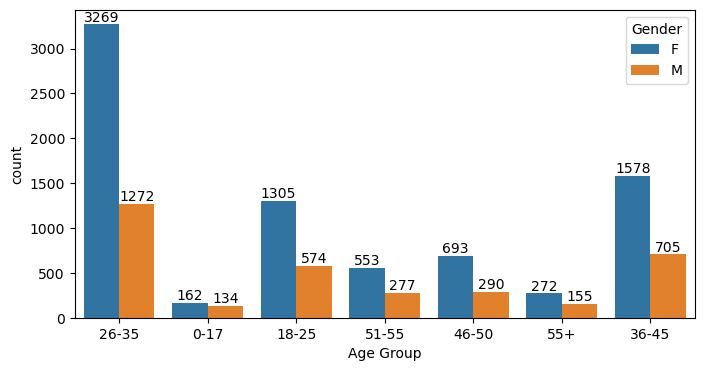

In [95]:
plt.figure(figsize=(8,4))
fig2 = sns.countplot(data=df,x='Age Group',hue='Gender')
for bars in fig2.containers:
    fig2.bar_label(bars)
plt.show()

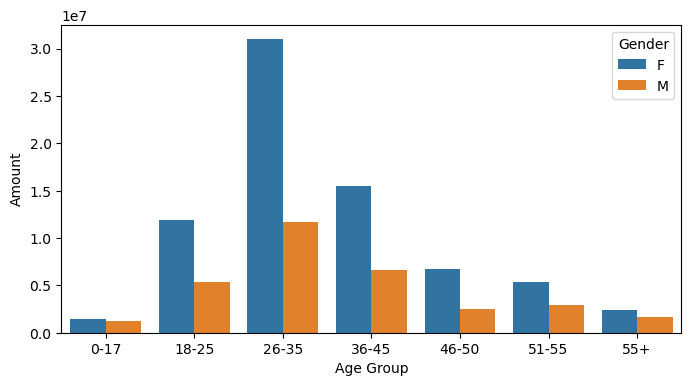

In [114]:
plt.figure(figsize=(8,4))
sales_age_grp = df[['Age Group','Amount','Gender']].groupby(['Age Group','Gender']).sum(numeric_only=True).reset_index()
fig3 = sns.barplot(data=sales_age_grp,x='Age Group',y='Amount',hue='Gender')
# for bars in fig3.containers:
#     fig3.bar_label(bars)
plt.show()

* so after seeing the above two plots we can see that females in the age group between 26-35 are generating more revenue for the company

### now let's see which are the top 8 states in purchasing items

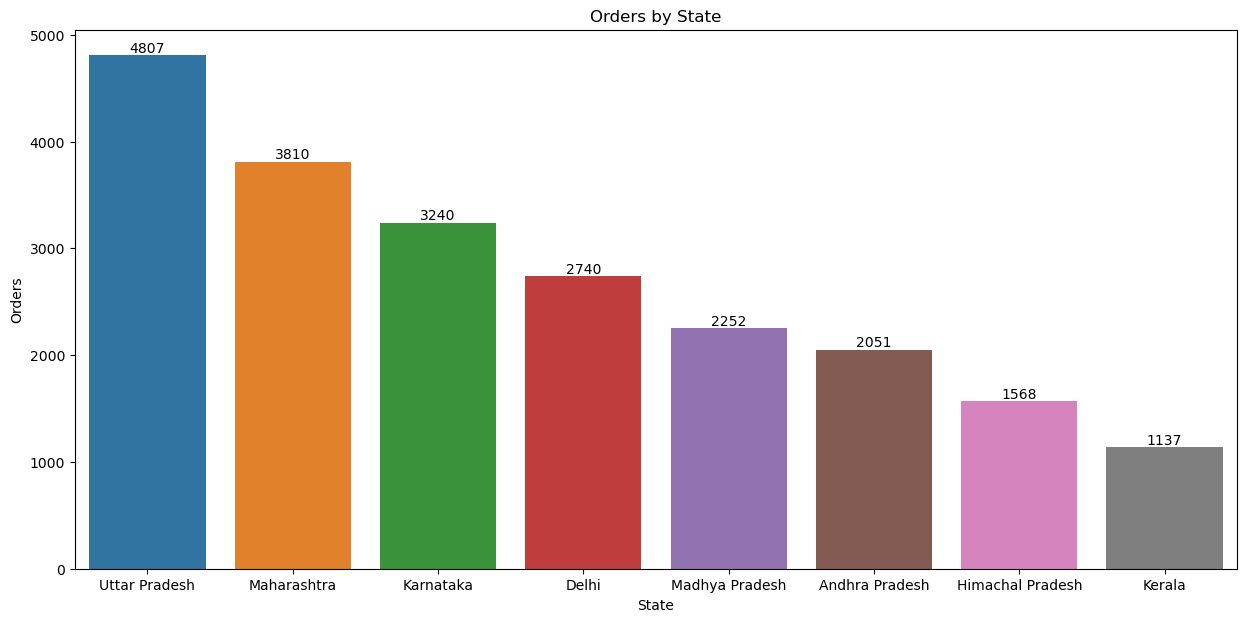

In [126]:
orders_by_state = df[['State','Orders']].groupby('State').sum(numeric_only=True).reset_index().sort_values('Orders',ascending=False)

plt.figure(figsize=(15,7))
fig4 = sns.barplot(data=orders_by_state[:8],x='State',y='Orders')
plt.title('Orders by State')
for bars in fig4.containers:
    fig4.bar_label(bars)
plt.show()


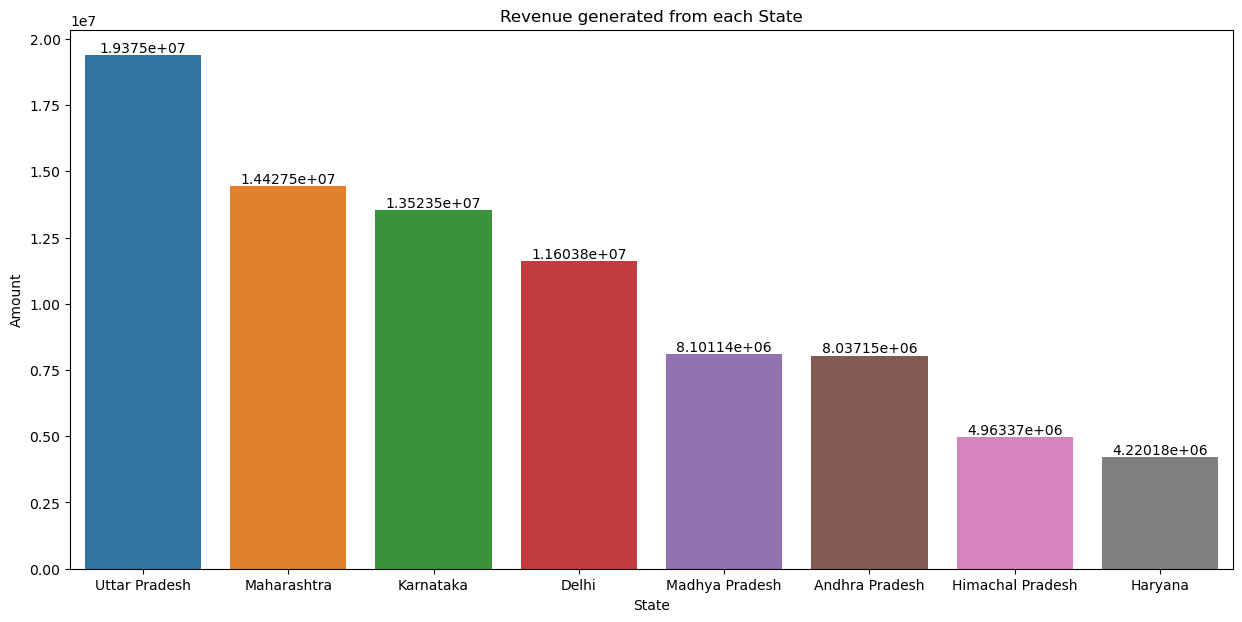

In [128]:
sales_by_state = df[['State','Amount']].groupby('State').sum(numeric_only=True).reset_index().sort_values('Amount',ascending=False)

plt.figure(figsize=(15,7))
fig5 = sns.barplot(data=sales_by_state[:8],x='State',y='Amount')
plt.title('Revenue generated from each State')
for bars in fig5.containers:
    fig5.bar_label(bars)
plt.show()

*  so we can say that uttarpradesh is in the 1st place in generating more revenue than any other states.
* The top three performing states are Uttar pradesh, Maharastra,Karnataka in terms of Number of orders and revenue Generated

### now let's see analysis of top 10 product categories sold

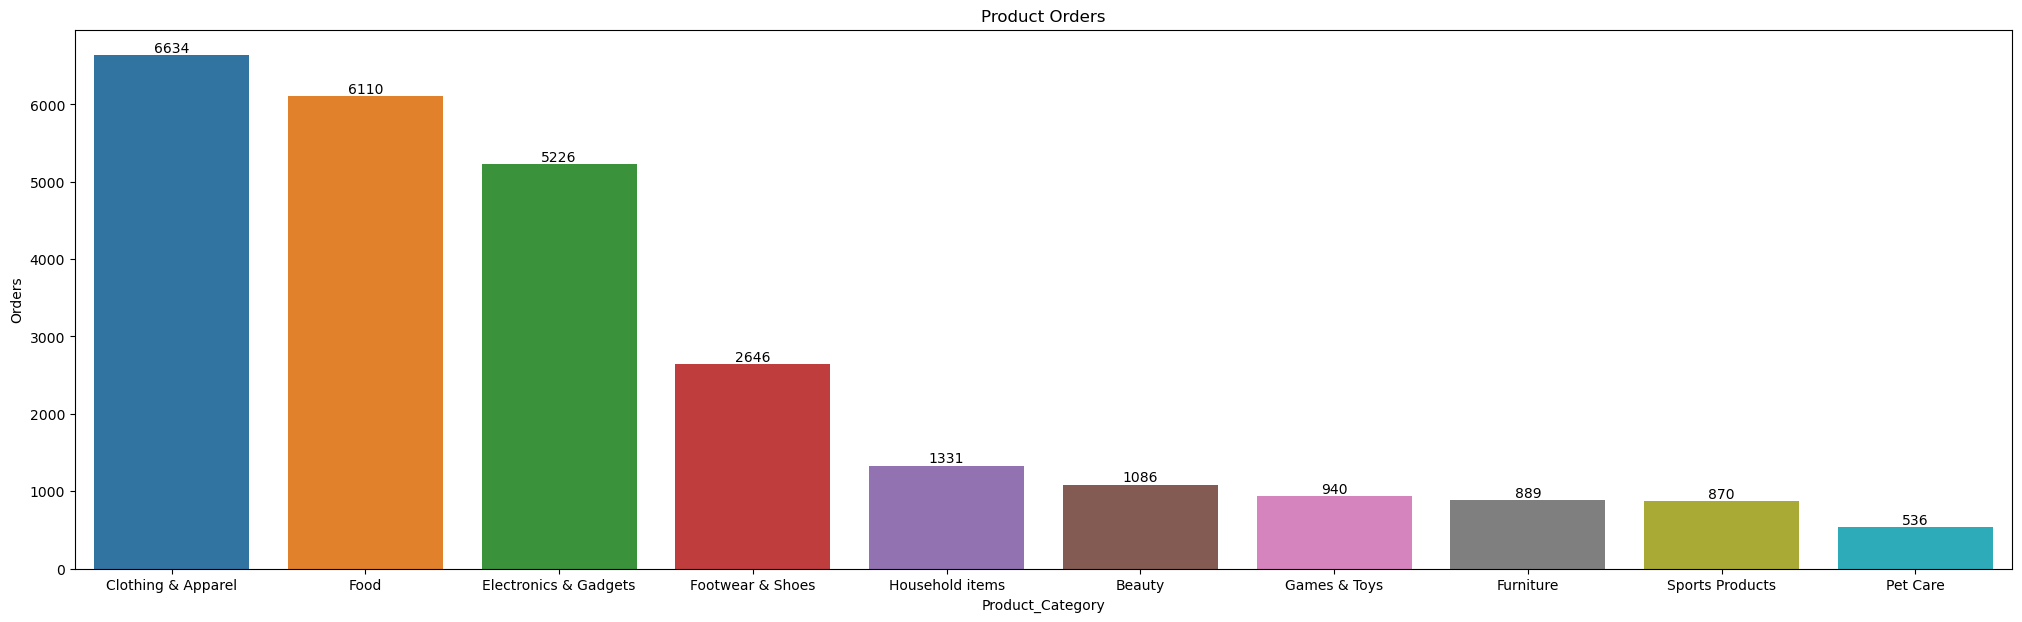

In [130]:
orders_by_state = df[['Product_Category','Orders']].groupby('Product_Category').sum(numeric_only=True).reset_index().sort_values('Orders',ascending=False)

plt.figure(figsize=(25,7))
fig5 = sns.barplot(data=orders_by_state[:10],x='Product_Category',y='Orders')
plt.title('Product Orders')
for bars in fig5.containers:
    fig5.bar_label(bars)
plt.show()

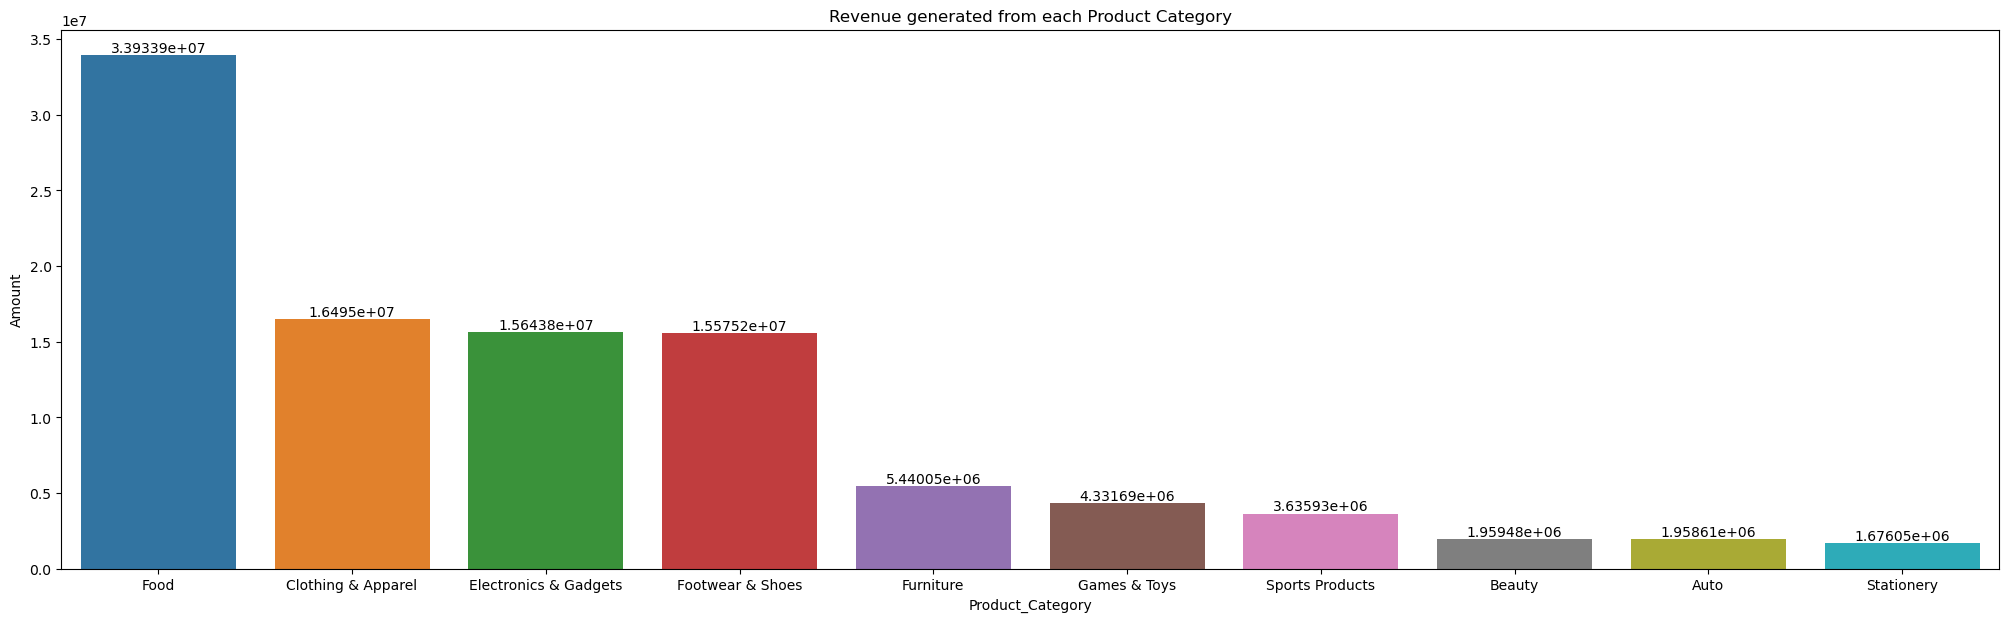

In [133]:
sales_by_pc = df[['Product_Category','Amount']].groupby('Product_Category').sum(numeric_only=True).reset_index().sort_values('Amount',ascending=False)

plt.figure(figsize=(25,7))
fig6 = sns.barplot(data=sales_by_pc[:10],x='Product_Category',y='Amount')
plt.title('Revenue generated from each Product Category')
for bars in fig6.containers:
    fig6.bar_label(bars)
plt.show()

* so we can see that food category is generating more revenue even though there are more orders of clothing & apparel in the first table